In [54]:
# 사용한 패키지 목록 및 버전
# gensim==4.3.1
# konlpy==0.6.0
# matplotlib==3.7.1
# nltk==3.8.1
# numpy==1.23.5
# pandas==1.5.3
# scikit_learn==1.2.2
# spacy==3.6.1
# tensorflow==2.12.0
# tensorflow_intel==2.12.0
# tqdm==4.65.0
# wordcloud==1.9.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family = 'Malgun Gothic')
import tqdm
from gensim.models import Word2Vec
from sklearn.cluster import KMeans,DBSCAN
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords 

!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lj040\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lj040\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lj040\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 640.0 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 487.6 kB/s eta 0:00:27
     --------------------------------------- 0.1/12.8 MB 465.5 kB/s eta 0:00:28
     --------------------------------------- 0.1/12.8 MB 595.3 kB/s eta 0:00:22
     --------------------------------------- 0.2/12.8 MB 654.6 kB/s eta 0:00:20
      -------------------------------------- 0.2/12.8 MB 731.4 kB/s eta 0:00:18
      -------------------------------------- 0.2/12.8 MB 758.5 kB/s eta 0:00:17
      -------------------------------------- 0.3/12.8 MB 739.6 kB/s eta 0:00:17
      -------------------------------------- 0.3/12.8 MB 754.8 kB/s eta 0:00:17
     - ------------------------------------- 0.4/12.8 MB 834.5 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 886.8 kB/s eta 0:00:14
     - ------------------------------------- 0.5

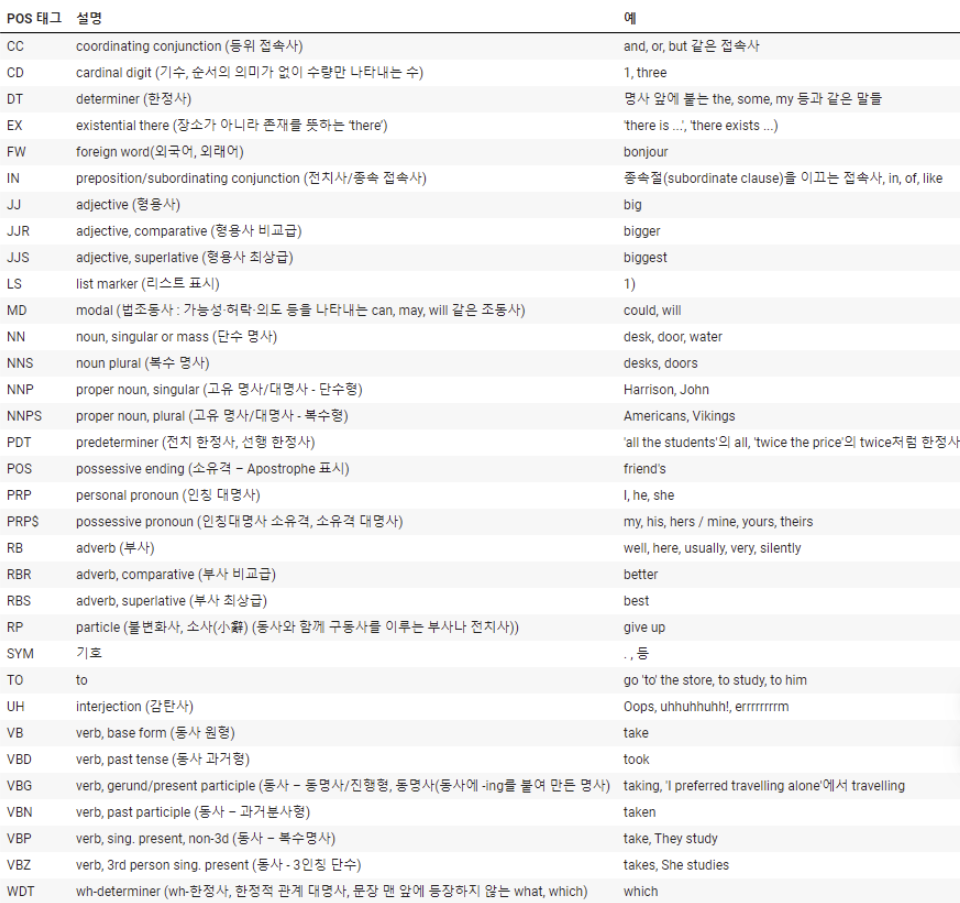

In [105]:
 
stop_words = set(stopwords.words('english')) 
# 불용어 추가
stop_words.update(['AND', 'OR', 'OF', 'WITH', 'OTHER', 'OTHERS', 'IN', 'FOR','PLASTICS','PLASTIC','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])


### 국제우편물사전통관

In [106]:
df_mail = pd.read_excel('../data/20230818/국제우편물사전통관검사결과.xlsx',engine='openpyxl')

C:\python\ml308\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [107]:
ddf = df_mail[df_mail['우편물검사결과코드'] !=0].copy()

In [108]:
ddf['cleansing'] = ddf['우편물품설명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [109]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)
    
# SPACY방식
#for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
#    doc = nlp(content)
#    nouns = [chunk.text for chunk in doc.noun_chunks]
#    noun_list.append(nouns)

100%|█████████████████████████████████████████████████████████████████████████| 720164/720164 [12:13<00:00, 981.24it/s]


In [110]:
noun_list[:10]

[['THERMOSBOTTLE'],
 ['TOYS'],
 ['MENS', 'BOYS', 'GARMENTS', 'COTTON', 'NES', 'NOT', 'KNITTED', 'CROCHETED'],
 ['FOOTWEAR'],
 ['PERMANENT', 'MAGNETS', 'AGGLOMERATED', 'FERRITE'],
 ['FOOD'],
 ['GIFT'],
 ['PACKED', 'COLUMN', 'HPLC', 'CHROMATOGRAPHY'],
 ['KEYBLANKH'],
 ['ATTACHED', 'INVOICE']]

In [111]:
ddf['nouns'] = noun_list

In [112]:
ddf.head(10)

,우편물번호,관리년도,우편물일련번호,검사일자,우편물검사결과코드,검사결과내용,검사지정사유내용,우편물품설명,cleansing,nouns
2,EA403944345CN,2019,1,20190124,26,지재권침해물품/필립플레인 청바지3점,"지재권 침해 물품 반입 유의. EMS 1일 수 백 건 발송. 물품명을 모두 ""the...",thermosbottle,THERMOSBOTTLE,[THERMOSBOTTLE]
4,CP078351296IT,2021,4,20210210,12,재감(면세범위초과),NaN,Toys,TOYS,[TOYS]
5,CP078351296IT,2021,2,20210210,12,재감(면세범위초과),NaN,"Mens or boys garments, of cotton, n.e.s. (not ...",MENS OR BOYS GARMENTS OF COTTON NES NOT KNITTE...,"[MENS, BOYS, GARMENTS, COTTON, NES, NOT, KNITT..."
6,CP078351296IT,2021,3,20210210,12,재감(면세범위초과),NaN,Footwear,FOOTWEAR,[FOOTWEAR]
7,CP078351296IT,2021,1,20210210,12,재감(면세범위초과),NaN,Permanent magnets of agglomerated ferrite,PERMANENT MAGNETS OF AGGLOMERATED FERRITE,"[PERMANENT, MAGNETS, AGGLOMERATED, FERRITE]"
8,EN074574647JP,2021,1,20210202,12,재감(면세범위초과),NaN,Food,FOOD,[FOOD]
9,EN074656465JP,2021,1,20210202,12,재감(면세범위초과,NaN,Gift,GIFT,[GIFT]
10,EN001780055JP,2021,1,20210203,12,재감(면세범위초과),NaN,Packed Column for HPLC (Chromatography),PACKED COLUMN FOR HPLC CHROMATOGRAPHY,"[PACKED, COLUMN, HPLC, CHROMATOGRAPHY]"
11,EN071560034JP,2021,1,20210201,12,재감(면세범위초과),NaN,KeyblankH834,KEYBLANKH,[KEYBLANKH]
12,EN000025427JP,2021,3,20210202,12,재감(면세범위초과),NaN,See the attached invoice,SEE THE ATTACHED INVOICE,"[ATTACHED, INVOICE]"


In [113]:
ddf.to_excel('./국제우편물_WordCount.xlsx',index=False,engine='openpyxl')

In [114]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

In [115]:
tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [116]:
tt.to_excel('./국제우편물_Keyword.xlsx',index=False,engine='openpyxl')

---
### 간이특송수입검사결과 

In [117]:
df_mail = pd.read_excel('../data/20230818/간이특송수입검사결과.xlsx',engine='openpyxl')

C:\python\ml308\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [118]:
df_mail.head(3)

,수입신고번호,란번호,신고세관부호,신고과코드,검사결과등록일자,수입검사결과코드,적발조치내역,신고품명,거래품명,적발조치내역_1
0,4131518176048M,1,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,WOMENS OR GIRLS OVERCOATS CAR-COATS CAPES CLO,COAT,기타 세액관련항목의 세액변동 없는 오류정정
1,4131518176048M,2,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,WOMENS OR GIRLS SUITS ENSEMBLES JACKETS BLAZE,ONE PIECE,기타 세액관련항목의 세액변동 없는 오류정정
2,4131518176048M,3,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,JACKETS AND BLAZERS,JACKET,기타 세액관련항목의 세액변동 없는 오류정정


In [119]:
ddf = df_mail[df_mail['수입검사결과코드'] !='A'].copy()

In [120]:
ddf['cleansing'] = ddf['거래품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [121]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|████████████████████████████████████████████████████████████████████████████| 4441/4441 [00:03<00:00, 1117.10it/s]


In [122]:
noun_list[:10]

[['COAT'],
 ['PIECE'],
 ['JACKET'],
 ['SHORTS'],
 ['GARDIGAN'],
 ['FILE', 'FOLDER'],
 ['KEY', 'CASE', 'KEY', 'HOLDER'],
 ['TOOL'],
 ['AUTO', 'FIRM', 'JOINT', 'MACHINE'],
 ['TOY', 'PARTS']]

In [123]:
ddf['nouns'] = noun_list

In [124]:
ddf.head(5)

,수입신고번호,란번호,신고세관부호,신고과코드,검사결과등록일자,수입검사결과코드,적발조치내역,신고품명,거래품명,적발조치내역_1,cleansing,nouns
0,4131518176048M,1,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,WOMENS OR GIRLS OVERCOATS CAR-COATS CAPES CLO,COAT,기타 세액관련항목의 세액변동 없는 오류정정,COAT,[COAT]
1,4131518176048M,2,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,WOMENS OR GIRLS SUITS ENSEMBLES JACKETS BLAZE,ONE PIECE,기타 세액관련항목의 세액변동 없는 오류정정,ONE PIECE,[PIECE]
2,4131518176048M,3,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,JACKETS AND BLAZERS,JACKET,기타 세액관련항목의 세액변동 없는 오류정정,JACKET,[JACKET]
3,4131518176048M,4,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,PANTS,SHORTS,기타 세액관련항목의 세액변동 없는 오류정정,SHORTS,[SHORTS]
4,4131518176048M,5,20,19,20180115,N4,기타 세액관련항목의 세액변동 없는 오류정정,WOMENS OR GIRLS BLOUSES SHIRTS AND SHIRT,GARDIGAN,기타 세액관련항목의 세액변동 없는 오류정정,GARDIGAN,[GARDIGAN]


In [125]:
ddf.to_excel('./간이특송수입검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [126]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [127]:
tt.to_excel('./간이특송수입검사결과_Keyword.xlsx',index=False,engine='openpyxl')

---
### 관리대상화물검사결과

In [128]:
df_mail = pd.read_excel('../data/20230818/관리대상화물검사결과.xlsx',engine='openpyxl')

In [129]:
df_mail.head(3)

,해상항공구분코드,검사결과등록일자,검사세관부호,물품품명,관리대상화물검사결과코드,검사결과내역,관리대상화물조치결과코드,조치결과내역
0,40,20211128,40,ALUMINUM BOX,H,품명 : ALUMINUM BOX\n규격 : \n상표 : \n원산지 : 미표시. \n...,2,통관부서 정보통보
1,10,20211130,30,SILICONE RUBBER HR-2951U(T),H,품명 : SILICONE RUBBER HR-2951U(T)\n원산지 : 중국\n원산...,2,품명 : SILICONE RUBBER HR-2951U(T)\n원산지 : 중국\n원산...
2,10,20211130,16,DATA CABLE POUCH SOCKET DOUBLE TUBE FOLDING ST...,I,품명 : DATA CABLE POUCH SOCKET DOUBLE TUBE FOLDI...,3,"'DATA CABLE' 원산지 미표시로 보수작업 대상, 'DOUBLE TUBE FO..."


In [130]:
ddf = df_mail[df_mail['관리대상화물검사결과코드'] !='A'].copy()

In [131]:
ddf['cleansing'] = ddf['물품품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [132]:

noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|█████████████████████████████████████████████████████████████████████████| 153309/153309 [02:55<00:00, 876.04it/s]


In [133]:
noun_list[:10]

[['ALUMINUM', 'BOX'],
 ['SILICONE', 'RUBBER', 'HRUT'],
 ['DATA',
  'CABLE',
  'POUCH',
  'SOCKET',
  'DOUBLE',
  'TUBE',
  'FOLDING',
  'STANDT',
  'HIGH',
  'SPEED',
  'CAR',
  'CHARGER',
  'PHONE',
  'STRAP'],
 ['BEAUTY', 'PRODUCTS'],
 ['CHAMOIS', 'BUTTR', 'ORIGINAL'],
 ['RESTAURANTS', 'EQUIPMENT', 'GAS', 'GRIDDLE'],
 ['PAINT'],
 ['BLUETOOTH', 'HEADSET'],
 ['GALANGAL'],
 ['MEDICAL', 'EQUIPMENT']]

In [134]:
ddf['nouns'] = noun_list

In [135]:
ddf.head(20)

,해상항공구분코드,검사결과등록일자,검사세관부호,물품품명,관리대상화물검사결과코드,검사결과내역,관리대상화물조치결과코드,조치결과내역,cleansing,nouns
0,40,20211128,40,ALUMINUM BOX,H,품명 : ALUMINUM BOX\n규격 : \n상표 : \n원산지 : 미표시. \n...,2,통관부서 정보통보,ALUMINUM BOX,"[ALUMINUM, BOX]"
1,10,20211130,30,SILICONE RUBBER HR-2951U(T),H,품명 : SILICONE RUBBER HR-2951U(T)\n원산지 : 중국\n원산...,2,품명 : SILICONE RUBBER HR-2951U(T)\n원산지 : 중국\n원산...,SILICONE RUBBER HRUT,"[SILICONE, RUBBER, HRUT]"
2,10,20211130,16,DATA CABLE POUCH SOCKET DOUBLE TUBE FOLDING ST...,I,품명 : DATA CABLE POUCH SOCKET DOUBLE TUBE FOLDI...,3,"'DATA CABLE' 원산지 미표시로 보수작업 대상, 'DOUBLE TUBE FO...",DATA CABLE POUCH SOCKET DOUBLE TUBE FOLDING ST...,"[DATA, CABLE, POUCH, SOCKET, DOUBLE, TUBE, FOL..."
3,40,20210822,40,BEAUTY PRODUCTS AND OTHERS,H,품명 : BEAUTY PRODUCTS AND OTHERS\n\n상표 : AMRITA...,2,품명 : BEAUTY PRODUCTS AND OTHERS\n\n상표 : AMRITA...,BEAUTY PRODUCTS AND OTHERS,"[BEAUTY, PRODUCTS]"
4,40,20210822,40,CHAMOIS BUTTR ORIGINAL,Z,품명 : CHAMOIS BUTTR ORIGINAL\n\n원산지 : MADE IN T...,2,품명 : CHAMOIS BUTTR ORIGINAL\n\n원산지 : MADE IN T...,CHAMOIS BUTTR ORIGINAL,"[CHAMOIS, BUTTR, ORIGINAL]"
5,40,20210822,40,RESTAURANTS EQUIPMENT (GAS GRIDDLE),I,품명 : RESTAURANTS EQUIPMENT\n규격 : MSA24-101 (S/...,3,품명 : RESTAURANTS EQUIPMENT\n규격 : MSA24-101 (S/...,RESTAURANTS EQUIPMENT GAS GRIDDLE,"[RESTAURANTS, EQUIPMENT, GAS, GRIDDLE]"
6,40,20210822,40,PAINT,Z,품명 : PAINT\n규격 : \n상표 : \n원산지 : manufactured i...,2,통관부서 정보통보,PAINT,[PAINT]
7,40,20211008,40,BLUETOOTH HEADSET,Z,품명 : BLUETOOTH HEADSET\n규격 : \n상표 : LG\n원산지 : ...,2,통관부서 정보통보,BLUETOOTH HEADSET,"[BLUETOOTH, HEADSET]"
8,40,20211007,40,RED GALANGAL,Z,품명 : RED GALANGAL\n규격 : \n상표 : \n원산지 : 베트남\n원산...,2,통관부서 정보통보,RED GALANGAL,[GALANGAL]
9,40,20211008,40,MEDICAL EQUIPMENT,Z,품명 : MEDICAL EQUIPMENT\n규격 : \n상표 : \n원산지 : 멕시...,2,통관부서 정보통보,MEDICAL EQUIPMENT,"[MEDICAL, EQUIPMENT]"


In [136]:
ddf.to_excel('./관리대상화물검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [137]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [138]:
tt.to_excel('./관리대상화물검사결과_Keyword.xlsx',index=False,engine='openpyxl')

---
### 수입검사결과

In [139]:
df_mail = pd.read_excel('../data/20230818/수입검사결과.xlsx',engine='openpyxl')

C:\python\ml308\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [141]:
df_mail.head(3)

,수입신고번호,란번호,신고세관부호,신고과코드,검사일자,수입검사결과코드,신고품명,거래품명,조치내용
0,1393518400666M,4,20,12,20180201,C1,DECORATION CRAFTS,DECORATION CRAFTS,"수량, 중량부족(과세가격 감소)"
1,4352118000216M,2,20,12,20180202,N3,PARTS OF WORKING TOOLS,POST DRIVER PARTS,원산지·적출국 오류정정
2,1235618113568M,1,40,58,20180202,N5,WHEEL,WHEEL,기타 신고항목 오류정정


In [143]:
ddf = df_mail[df_mail['수입검사결과코드'] !='A'].copy()

In [144]:
ddf['cleansing'] = ddf['거래품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [145]:

noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|████████████████████████████████████████████████████████████████████████| 790651/790651 [12:24<00:00, 1062.38it/s]


In [146]:
noun_list[:10]

[['DECORATION', 'CRAFTS'],
 ['POST', 'DRIVER', 'PARTS'],
 ['WHEEL'],
 ['DRS', 'WOLFSON', 'TRIPLE', 'COMBO', 'POWDER', 'SUPPLEMENT'],
 ['SOURCE', 'NATURALS', 'MEGA', 'STRENGTH', 'BETA', 'SITOSTEROL'],
 ['SOURCE', 'NATURALS', 'MEGA', 'STRENGTH', 'BETA', 'SITOSTEROL'],
 ['FABRIC'],
 ['TOOTHPASTE'],
 ['INSTANT', 'COFFEE'],
 ['DECORATION', 'CRAFTS']]

In [147]:
ddf['nouns'] = noun_list

In [148]:
ddf.head(20)

,수입신고번호,란번호,신고세관부호,신고과코드,검사일자,수입검사결과코드,신고품명,거래품명,조치내용,cleansing,nouns
0,1393518400666M,4,20,12,20180201,C1,DECORATION CRAFTS,DECORATION CRAFTS,"수량, 중량부족(과세가격 감소)",DECORATION CRAFTS,"[DECORATION, CRAFTS]"
1,4352118000216M,2,20,12,20180202,N3,PARTS OF WORKING TOOLS,POST DRIVER PARTS,원산지·적출국 오류정정,POST DRIVER PARTS,"[POST, DRIVER, PARTS]"
2,1235618113568M,1,40,58,20180202,N5,WHEEL,WHEEL,기타 신고항목 오류정정,WHEEL,[WHEEL]
3,1364018057478M,1,40,94,20180202,L2,OTHER,THE DRS WOLFSON TRIPLE COMBO POWDER SUPPLEMENT,관세법 94조 3내지4호 (소액물품 등) 면세불허,THE DRS WOLFSON TRIPLE COMBO POWDER SUPPLEMENT,"[DRS, WOLFSON, TRIPLE, COMBO, POWDER, SUPPLEMENT]"
4,4436018104550M,1,40,94,20180202,L2,OTHER,SOURCE NATURALS MEGA STRENGTH BETA SITOSTEROL 375,"수량, 중량과다(과세가격 증액)",SOURCE NATURALS MEGA STRENGTH BETA SITOSTEROL,"[SOURCE, NATURALS, MEGA, STRENGTH, BETA, SITOS..."
5,4436018104550M,1,40,94,20180202,C2,OTHER,SOURCE NATURALS MEGA STRENGTH BETA SITOSTEROL 375,"수량, 중량과다(과세가격 증액)",SOURCE NATURALS MEGA STRENGTH BETA SITOSTEROL,"[SOURCE, NATURALS, MEGA, STRENGTH, BETA, SITOS..."
6,4148918660146M,1,20,11,20180202,K,FABRIC OF POLYESTER,FABRIC,수리후 분석의뢰 또는 품목분류 질의,FABRIC,[FABRIC]
7,1235618117285M,1,40,58,20180202,N5,TOOTHPASTE,TOOTHPASTE,기타 신고항목 오류정정,TOOTHPASTE,[TOOTHPASTE]
8,1235618117285M,2,40,58,20180202,N5,INSTANT COFFEE,INSTANT COFFEE,기타 신고항목 오류정정,INSTANT COFFEE,"[INSTANT, COFFEE]"
9,1393518400666M,7,20,12,20180201,G7,DECORATION CRAFTS,DECORATION CRAFTS,세액변동 없는 세번변경(HS4단위 이상),DECORATION CRAFTS,"[DECORATION, CRAFTS]"


In [149]:
ddf.to_excel('./수입검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [150]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [151]:
tt.to_excel('./수입검사결과_Keyword.xlsx',index=False,engine='openpyxl')

---
### 수입안전성검사결과

In [152]:
df_mail = pd.read_excel('../data/20230818/수입안전성검사결과.xlsx',engine='openpyxl')

In [153]:
df_mail.head(3)

,수입신고번호,란번호,신고품명,거래품명,신고세관부호,신고과코드,검사일자,수입안전성검사결과코드,수입안전성검사결과상세내역,수입검사결과코드,조치내용
0,4131518937032M,1,OTHER,FOOD HYLEYS SLIM TEA ASSORTED TEA COLLECTION 4...,40,94,20181124,B,NaN,NaN,중점감시 수입식품 통관보류
1,4176718109321M,2,STAINLESS SCRAP,STAINLESS SCRAP,20,09,20180911,A,NaN,NaN,안전인증기관평가의뢰
2,4053418501155M,1,OTHER LIGHTING FITTINGS PARTS,LED LIGHTING PARTS,20,11,20180911,A,NaN,NaN,기타 구비서류 징구


In [156]:
ddf = df_mail[df_mail['수입안전성검사결과코드'] !='A'].copy()

In [157]:
ddf['cleansing'] = ddf['거래품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [158]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|███████████████████████████████████████████████████████████████████████████| 65522/65522 [01:13<00:00, 896.03it/s]


In [159]:
noun_list[:10]

[['FOOD', 'HYLEYS', 'SLIM', 'TEA', 'ASSORTED', 'TEA', 'COLLECTION', 'TE'],
 ['INCH', 'FHD', 'HZ', 'CURVED', 'MONITOR'],
 ['NOW', 'FOODS', 'ALOE', 'VERA', 'GELS'],
 ['NOW', 'FOODS', 'ALOE', 'VERA', 'GELS'],
 ['NOW', 'FOODS', 'CHONDROITIN', 'SULFATE'],
 ['TRUNATURE', 'GINKO', 'BILOBA'],
 ['SOURCE', 'NATURALS', 'SOURCE', 'NATURAL'],
 ['NATROL', 'MELATONIN', 'FAST', 'DISSOLVE', 'TABLETS', 'CITRUS', 'FLAV'],
 ['MEDICINE', 'GINKO', 'BILOBA', 'VINPOCETINE', 'TRUNATURE'],
 ['MEDICINE', 'VITAFUSION', 'EXTRA', 'STRENGTH', 'MELATONIN', 'BLACK']]

In [160]:
ddf['nouns'] = noun_list

In [161]:
ddf.head(20)

,수입신고번호,란번호,신고품명,거래품명,신고세관부호,신고과코드,검사일자,수입안전성검사결과코드,수입안전성검사결과상세내역,수입검사결과코드,조치내용,cleansing,nouns
0,4131518937032M,1,OTHER,FOOD HYLEYS SLIM TEA ASSORTED TEA COLLECTION 4...,40,94,20181124,B,NaN,NaN,중점감시 수입식품 통관보류,FOOD HYLEYS SLIM TEA ASSORTED TEA COLLECTION TE,"[FOOD, HYLEYS, SLIM, TEA, ASSORTED, TEA, COLLE..."
3,4124418101886M,1,LED MONITOR,32 INCH FHD 144HZ CURVED MONITOR,20,80,20180914,F,NaN,NaN,"본품 모니터와 부품 직류전원장치는 적합, 다른 부품인 코드세트가 부적합 : 표시사항...",INCH FHD HZ CURVED MONITOR,"[INCH, FHD, HZ, CURVED, MONITOR]"
5,4111918C05433M,2,OTHER,NOW FOODS ALOE VERA GELS 100 S,40,94,20180912,C,NaN,NaN,중점감시 수입식품 통관보류,NOW FOODS ALOE VERA GELS S,"[NOW, FOODS, ALOE, VERA, GELS]"
6,4111918C05391M,3,OTHER,NOW FOODS ALOE VERA GELS 100 S,40,94,20180905,C,NaN,NaN,중점감시 수입식품 통관보류,NOW FOODS ALOE VERA GELS S,"[NOW, FOODS, ALOE, VERA, GELS]"
7,4111918E75252M,1,OTHER,NOW FOODS CHONDROITIN SULFATE,40,94,20180917,C,NaN,NaN,중점감시 수입식품 통관보류,NOW FOODS CHONDROITIN SULFATE,"[NOW, FOODS, CHONDROITIN, SULFATE]"
10,4232718476008M,1,OTHER,TRUNATURE GINKO BILOBA,40,58,20180914,C,NaN,NaN,중점감시 수입식품 통관보류,TRUNATURE GINKO BILOBA,"[TRUNATURE, GINKO, BILOBA]"
13,1077218319252M,1,OTHER,SOURCE NATURALS SOURCE NATURAL,40,58,20180913,C,NaN,NaN,수입요건확인서류 징구,SOURCE NATURALS SOURCE NATURAL,"[SOURCE, NATURALS, SOURCE, NATURAL]"
15,1334118882500M,1,OTHER,NATROL MELATONIN FAST DISSOLVE TABLETS CITRUS ...,40,58,20180905,C,NaN,NaN,"기타 구비서류 징구, 소견서 징구",NATROL MELATONIN FAST DISSOLVE TABLETS CITRUS ...,"[NATROL, MELATONIN, FAST, DISSOLVE, TABLETS, C..."
17,4304618254890M,1,OTHER,MEDICINE GINKO BILOBA WITH VINPOCETINE TRUNA...,40,94,20180912,B,NaN,NaN,중점감시 수입식품 통관보류,MEDICINE GINKO BILOBA WITH VINPOCETINE TRUNA...,"[MEDICINE, GINKO, BILOBA, VINPOCETINE, TRUNATURE]"
19,4304618253244M,1,OTHER,MEDICINE VITAFUSION EXTRA STRENGTH MELATONIN B...,40,94,20180913,C,NaN,NaN,기타 구비서류 징구,MEDICINE VITAFUSION EXTRA STRENGTH MELATONIN B...,"[MEDICINE, VITAFUSION, EXTRA, STRENGTH, MELATO..."


In [162]:
ddf.to_excel('./수입안전성검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [163]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [164]:
tt.to_excel('./수입안전성검사결과_Keyword.xlsx',index=False,engine='openpyxl')

---
### 수출신고지검사결과

In [165]:
df_mail = pd.read_excel('../data/20230818/수출신고지검사결과.xlsx',engine='openpyxl')

In [166]:
df_mail.head(3)

,수출신고번호,품명,거래품명,검사일자,수출신고세관부호,수출신고과코드,수출검사결과코드,수출검사결과조치코드,검사조치내역
0,1058618002129X,RED PEPPER POWDER WITH SEED,RED PEPPER POWDER,20180822,12,10,L,C,분석의뢰
1,1286918201786R,OTHER PLASTICS ROD,POLY ETHER ETHER KETON ROD,20181226,20,15,M1,F,서류 정정 후 통관
2,1286918201786R,OTHER PLASTICS PLATE,POLY ETHER ETHER KETON PLATE,20181226,20,15,M1,F,서류 정정 후 통관


In [168]:
ddf = df_mail[df_mail['수출검사결과코드'] !='A'].copy()

In [169]:
ddf['cleansing'] = ddf['거래품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [170]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|██████████████████████████████████████████████████████████████████████████| 10281/10281 [00:10<00:00, 1004.37it/s]


In [171]:
noun_list[:10]

[['PEPPER', 'POWDER'],
 ['POLY', 'ETHER', 'ETHER', 'KETON', 'ROD'],
 ['POLY', 'ETHER', 'ETHER', 'KETON', 'PLATE'],
 ['SNACK'],
 ['USED', 'JEWELRY', 'MACHINE'],
 ['SESAME', 'OIL'],
 ['PEPPER', 'POWDER'],
 ['PEPPER', 'POWDER'],
 ['PEPPER', 'POWDER', 'SEED'],
 ['CAT', 'HOUSE']]

In [172]:
ddf['nouns'] = noun_list

In [173]:
ddf.head(20)

,수출신고번호,품명,거래품명,검사일자,수출신고세관부호,수출신고과코드,수출검사결과코드,수출검사결과조치코드,검사조치내역,cleansing,nouns
0,1058618002129X,RED PEPPER POWDER WITH SEED,RED PEPPER POWDER,20180822,12,10,L,C,분석의뢰,RED PEPPER POWDER,"[PEPPER, POWDER]"
1,1286918201786R,OTHER PLASTICS ROD,POLY ETHER ETHER KETON ROD,20181226,20,15,M1,F,서류 정정 후 통관,POLY ETHER ETHER KETON ROD,"[POLY, ETHER, ETHER, KETON, ROD]"
2,1286918201786R,OTHER PLASTICS PLATE,POLY ETHER ETHER KETON PLATE,20181226,20,15,M1,F,서류 정정 후 통관,POLY ETHER ETHER KETON PLATE,"[POLY, ETHER, ETHER, KETON, PLATE]"
3,1360319500008X,SNACK,SNACK,20190104,20,15,M1,F,모델규격 정정후 통관,SNACK,[SNACK]
4,1166018101851X,USED MACHINE,USED A JEWELRY MACHINE,20180904,30,82,M1,B,적재예정보세구역 정정보완통보,USED A JEWELRY MACHINE,"[USED, JEWELRY, MACHINE]"
5,4053418909822X,SESAME OIL,SESAME OIL,20180905,131,10,L,C,가짜 참기름등 위장수출 여부확인을 위한 사후분석의뢰,SESAME OIL,"[SESAME, OIL]"
6,1058618003255X,RED PEPPER POWDER WITH SEED,RED PEPPER POWDER,20181224,12,10,L,C,환급대상 고춧가루 분석의뢰,RED PEPPER POWDER,"[PEPPER, POWDER]"
7,1058618003260X,RED PEPPER POWDER WITH SEED,RED PEPPER POWDER,20181226,12,10,L,C,환급대상 고춧가루 분석의뢰,RED PEPPER POWDER,"[PEPPER, POWDER]"
8,4457818100065X,RED PEPPER POWDER WITH SEED,RED PEPPER POWDER WITH SEED,20181008,153,10,L,C,원재료 20kg 수출물품 500g 분석의뢰함.,RED PEPPER POWDER WITH SEED,"[PEPPER, POWDER, SEED]"
9,1331718300915X,OTHER,CAT HOUSE,20181002,30,82,M1,B,적재예정보세구역 확인,CAT HOUSE,"[CAT, HOUSE]"


In [174]:
ddf.to_excel('./수출신고지검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [175]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [176]:
tt.to_excel('./수출신고지검사결과_Keyword.xlsx',index=False,engine='openpyxl')

---
### 수출적재지검사결과

In [177]:
df_mail = pd.read_excel('../data/20230818/수출적재지검사결과.xlsx',engine='openpyxl')

In [178]:
df_mail.head(3)

,수출신고번호,수출신고란번호,품명,거래품명,수출신고규격일련번호,검사일자,검사세관부호,검사과코드,수출검사결과코드,수출검사결과조치코드,검사조치내역
0,4275418500040X,13,OTHER,RECTIFIER,1301,20180126,30,82,M2,Z,케이블 등 추가 신고
1,4275418500040X,14,OTHER,PLASTIC WRAP,1401,20180126,30,82,M2,Z,케이블 등 추가 신고
2,4275418500040X,15,OTHER,WIRE REEL,1501,20180126,30,82,M2,Z,케이블 등 추가 신고


In [179]:
ddf = df_mail[df_mail['수출검사결과코드'] !='A'].copy()

In [180]:
ddf['cleansing'] = ddf['거래품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [181]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|████████████████████████████████████████████████████████████████████████| 102700/102700 [01:33<00:00, 1102.52it/s]


In [182]:
noun_list[:10]

[['RECTIFIER'],
 ['WRAP'],
 ['WIRE', 'REEL'],
 ['USED', 'CAR'],
 ['DIMODAN', 'HPLC'],
 ['FITTING', 'FLANGE'],
 ['URETHANE'],
 ['URETHANE'],
 ['URETHANE'],
 ['URETHANE']]

In [183]:
ddf['nouns'] = noun_list

In [184]:
ddf.head(20)

,수출신고번호,수출신고란번호,품명,거래품명,수출신고규격일련번호,검사일자,검사세관부호,검사과코드,수출검사결과코드,수출검사결과조치코드,검사조치내역,cleansing,nouns
0,4275418500040X,13,OTHER,RECTIFIER,1301,20180126,30,82,M2,Z,케이블 등 추가 신고,RECTIFIER,[RECTIFIER]
1,4275418500040X,14,OTHER,PLASTIC WRAP,1401,20180126,30,82,M2,Z,케이블 등 추가 신고,PLASTIC WRAP,[WRAP]
2,4275418500040X,15,OTHER,WIRE REEL,1501,20180126,30,82,M2,Z,케이블 등 추가 신고,WIRE REEL,"[WIRE, REEL]"
3,1204818300334X,1,USED CAR,USED CAR,101,20180125,30,82,M1,Z,운송형태 fc로 정정,USED CAR,"[USED, CAR]"
4,1085518300104X,1,ARTIFICIAL WAXES,DIMODAN HP-LC,101,20180111,30,82,M1,Z,운송형태 정정,DIMODAN HPLC,"[DIMODAN, HPLC]"
5,4046718500022X,2,FITTING & FLANGE,FITTING & FLANGE,201,20180125,30,82,M1,Z,운송형태 fc로 정정,FITTING FLANGE,"[FITTING, FLANGE]"
6,4077318010290X,1,MATERIALS FOR MAKING HAIRPIECE,URETHANE,101,20180126,30,82,E1,F,제조자 미상으로 정정 후 통관,URETHANE,[URETHANE]
7,4077318010290X,1,MATERIALS FOR MAKING HAIRPIECE,URETHANE,102,20180126,30,82,E1,F,제조자 미상으로 정정 후 통관,URETHANE,[URETHANE]
8,4077318010290X,1,MATERIALS FOR MAKING HAIRPIECE,URETHANE,103,20180126,30,82,E1,F,제조자 미상으로 정정 후 통관,URETHANE,[URETHANE]
9,4077318010290X,1,MATERIALS FOR MAKING HAIRPIECE,URETHANE,104,20180126,30,82,E1,F,제조자 미상으로 정정 후 통관,URETHANE,[URETHANE]


In [185]:
ddf.to_excel('./수출적재지검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [186]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [187]:
tt.to_excel('./수출적재지검사결과_Keyword.xlsx',index=False,engine='openpyxl')

---
### 수출적재지안전성검사

In [188]:
df_mail = pd.read_excel('../data/20230818/수출적재지안전성검사.xlsx',engine='openpyxl')

In [190]:
df_mail.head(3)

,검사일자,수출신고번호,수출신고란번호,수출신고규격일련번호,품명,거래품명,검사세관부호,검사과코드,수출안전성검사결과코드,검사조치내역
0,20181012,3384918002933X,1,101,OTHER,PFA LINED BALL VALVE,40,80,A,전략물자 사전수출허가 받음
1,20181029,1065418100629X,1,101,VALVES FOR OLEOHYDRAULIC TRANSMISSIONS,VALVES FOR OLEOHYDRAULIC TRANSMISSIONS,40,80,A,"서류심사결과, 전략물자 비해당"
2,20181029,1065418100629X,1,102,VALVES FOR OLEOHYDRAULIC TRANSMISSIONS,VALVES FOR OLEOHYDRAULIC TRANSMISSIONS,40,80,A,"서류심사결과, 전략물자 비해당"


In [192]:
ddf = df_mail[df_mail['수출안전성검사결과코드'] !='A'].copy()

In [193]:
ddf['cleansing'] = ddf['거래품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [194]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|████████████████████████████████████████████████████████████████████████████| 4340/4340 [00:03<00:00, 1145.66it/s]


In [195]:
noun_list[:10]

[['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES'],
 ['FORGED', 'STEEL', 'VALVES']]

In [196]:
ddf['nouns'] = noun_list

In [197]:
ddf.head(20)

,검사일자,수출신고번호,수출신고란번호,수출신고규격일련번호,품명,거래품명,검사세관부호,검사과코드,수출안전성검사결과코드,검사조치내역,cleansing,nouns
10,20181010,4136518090379X,1,101,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
11,20181010,4136518090379X,1,102,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
12,20181010,4136518090379X,1,103,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
13,20181010,4136518090379X,1,104,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
14,20181010,4136518090379X,1,105,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
15,20181010,4136518090379X,1,106,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
16,20181010,4136518090379X,1,107,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
17,20181010,4136518090379X,1,108,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
18,20181010,4136518090379X,1,109,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"
19,20181010,4136518090379X,1,110,FORGED STEEL VALVES,FORGED STEEL VALVES,40,80,B,1~12행 신고물품 총 26점 전략물자 대상,FORGED STEEL VALVES,"[FORGED, STEEL, VALVES]"


In [198]:
ddf.to_excel('./수출적재지안전성검사_WordCount.xlsx',index=False,engine='openpyxl')

In [199]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [200]:
tt.to_excel('./수출적재지안전성검사_Keyword.xlsx',index=False,engine='openpyxl')

---
### 특송화물검사결과 

In [206]:
df_mail = pd.read_excel('../data/20230818/특송화물검사결과.xlsx',engine='openpyxl')

C:\python\ml308\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [210]:
df_mail.head(3)

,통관목록제출번호,화물관리번호,통관목록제출일자,제출세관부호,제출과코드,목록통관거래유형코드,목록통관배제유형코드,검사결과코드1,검사결과코드2,검사결과코드3,검사결과내용,수입신고불가사유내용,통관목록품명
0,AE01101800000039,18KE02M1BII00040173,20180112,40,55,A,NaN,29,NaN,NaN,혈압측정기,NaN,OMRON 10 SERIES WIRELESS UPPER ARM BLOOD PRESS...
1,SE01872200000713,22HDFC6256I96321324,20221226,20,C5,A,NaN,29,NaN,NaN,헤드폰 3개,NaN,"HEADPHONESEARPHONES HEADPHONES 1,HEADPHONESEA..."
2,SE01872200000713,22HDFC6256I96322107,20221226,20,C5,A,NaN,29,NaN,NaN,헤드폰 5개,NaN,HEADSETEARPHONES HEADPHONES 5


In [212]:
ddf = df_mail[df_mail['검사결과코드1'] !=0].copy()

In [213]:
ddf['cleansing'] = ddf['통관목록품명'].str.upper()
ddf['cleansing'] = ddf['cleansing'].str.replace("[^a-zA-Z ]","", regex=True)

In [214]:
noun_list = []

# NLTK방식
for content in tqdm.tqdm(ddf['cleansing'].fillna('')): 
    tokens = nltk.word_tokenize(content)
    # 불용어 처리
    result = []
    for w in tokens: 
        if w not in stop_words: 
            result.append(w) 
    tags = nltk.pos_tag(result)
    nouns = [word for word, pos in tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    noun_list.append(nouns)

100%|███████████████████████████████████████████████████████████████████████| 1047992/1047992 [19:16<00:00, 906.22it/s]


In [215]:
noun_list[:10]

[['OMRON',
  'SERIES',
  'WIRELESS',
  'UPPER',
  'ARM',
  'BLOOD',
  'PRESSURE',
  'MONITOR',
  'CUFF',
  'THAT',
  'FITS',
  'STANDARD',
  'LARGE',
  'ARMS',
  'BPBPN',
  'BLUETOOTH'],
 ['HEADPHONESEARPHONES', 'HEADPHONES', 'HEADPHONESEARPHONES', 'HEADPHONES'],
 ['HEADSETEARPHONES', 'HEADPHONES'],
 ['CABLE', 'PCSCONNECTORPCS'],
 ['GEAR', 'BLANK', 'PCSCANPEAK', 'HANDLE', 'CAP', 'TOOL', 'PCS'],
 ['PHONE', 'CASE'],
 ['SPEAKERSPEAKERS'],
 ['SMALL', 'HEATER', 'THAT', 'DOESN', 'MOVE', 'AT', 'HOME', 'GREY'],
 ['FUEL', 'OIL', 'HEATER'],
 ['FUEL', 'OIL', 'HEATER']]

In [216]:
ddf['nouns'] = noun_list

In [217]:
ddf.head(20)

,통관목록제출번호,화물관리번호,통관목록제출일자,제출세관부호,제출과코드,목록통관거래유형코드,목록통관배제유형코드,검사결과코드1,검사결과코드2,검사결과코드3,검사결과내용,수입신고불가사유내용,통관목록품명,cleansing,nouns
0,AE01101800000039,18KE02M1BII00040173,20180112,40,55,A,NaN,29,NaN,NaN,혈압측정기,NaN,OMRON 10 SERIES WIRELESS UPPER ARM BLOOD PRESS...,OMRON SERIES WIRELESS UPPER ARM BLOOD PRESSUR...,"[OMRON, SERIES, WIRELESS, UPPER, ARM, BLOOD, P..."
1,SE01872200000713,22HDFC6256I96321324,20221226,20,C5,A,NaN,29,NaN,NaN,헤드폰 3개,NaN,"HEADPHONESEARPHONES HEADPHONES 1,HEADPHONESEA...",HEADPHONESEARPHONES HEADPHONES HEADPHONESEARP...,"[HEADPHONESEARPHONES, HEADPHONES, HEADPHONESEA..."
2,SE01872200000713,22HDFC6256I96322107,20221226,20,C5,A,NaN,29,NaN,NaN,헤드폰 5개,NaN,HEADSETEARPHONES HEADPHONES 5,HEADSETEARPHONES HEADPHONES,"[HEADSETEARPHONES, HEADPHONES]"
3,AE01432200005172,22KE08QCSII00010010,20221228,40,55,E,NaN,13,NaN,NaN,NaN,NaN,Cable 6130PCSconnector400PCS,CABLE PCSCONNECTORPCS,"[CABLE, PCSCONNECTORPCS]"
4,AE01432200005172,22KE08QCSII00010013,20221228,40,55,E,NaN,13,NaN,NaN,NaN,NaN,GEAR BLANK 699PCSCANPEAK HANDLE CAP TOOL 1PCS,GEAR BLANK PCSCANPEAK HANDLE CAP TOOL PCS,"[GEAR, BLANK, PCSCANPEAK, HANDLE, CAP, TOOL, PCS]"
5,AE01432200005172,22KE08QCSII00010095,20221228,40,55,D,NaN,13,NaN,NaN,NaN,NaN,phone case,PHONE CASE,"[PHONE, CASE]"
6,PE00262200007419,22YTFF1623I00024055,20221217,16,26,A,NaN,29,NaN,NaN,전파법,NaN,SPEAKER(SPEAKERS)(1),SPEAKERSPEAKERS,[SPEAKERSPEAKERS]
7,PE00282200000199,22PJDF1118I30120055,20221022,16,26,A,NaN,29,NaN,NaN,전파법,NaN,A SMALL HEATER THAT DOESN T MOVE AT HOME (GREY...,A SMALL HEATER THAT DOESN T MOVE AT HOME GREY V,"[SMALL, HEATER, THAT, DOESN, MOVE, AT, HOME, G..."
8,PE00282200000199,22PJDF1118I30120632,20221022,16,26,A,NaN,29,NaN,NaN,전파법,NaN,FUEL OIL HEATER(1),FUEL OIL HEATER,"[FUEL, OIL, HEATER]"
9,PE00282200000199,22PJDF1118I30120635,20221022,16,26,A,NaN,29,NaN,NaN,전파법,NaN,FUEL OIL HEATER(1),FUEL OIL HEATER,"[FUEL, OIL, HEATER]"


In [218]:
ddf.to_excel('./특송화물검사결과_WordCount.xlsx',index=False,engine='openpyxl')

In [219]:
df_exploded = ddf.explode('nouns')

# 단어별 출현 건수 계산
word_counts = df_exploded['nouns'].value_counts()

tt = pd.DataFrame(word_counts)
tt['name'] = word_counts.index

In [220]:
tt.to_excel('./특송화물검사결과_Keyword.xlsx',index=False,engine='openpyxl')